## Distribution Plots

- distplot
- jointplot
- pairplot
- rugplot
- kdeplot

In [2]:
# Imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create dataframe
df = sns.load_dataset('tips') # Load dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

### Distplot

The **distplot** shows the distribution of a univariate set of observations.

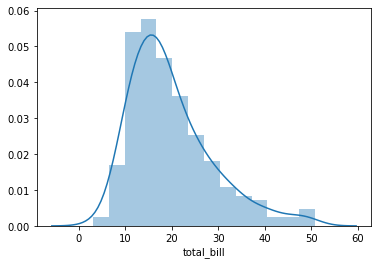

In [5]:
sns.distplot(df['total_bill'])
plt.show()

**To remove the kde layer and just have the histogram use:**

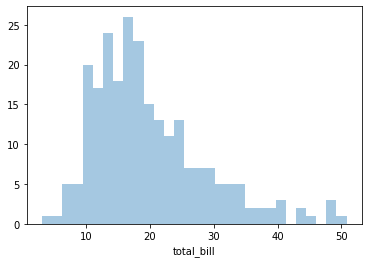

In [7]:
sns.distplot(df['total_bill'],kde=False,bins=30)
plt.show()

## Jointplot

**Jointplot** allows you to basically match up two distplots for bivariate data. With your choice of what kind parameter to compare with:

- scatter
- reg
- resid
- kde
- hex

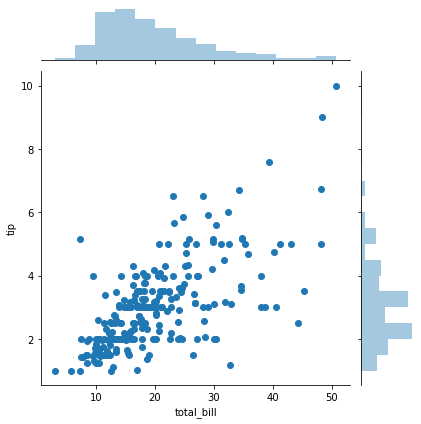

In [8]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='scatter')
plt.show()

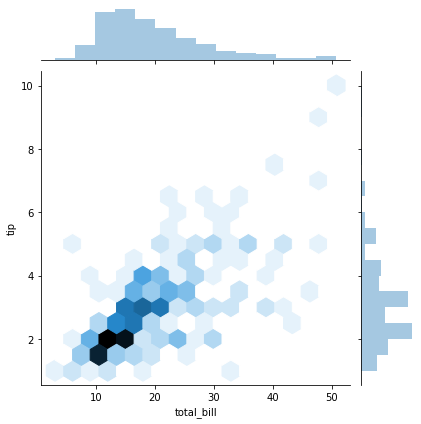

In [9]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='hex')
plt.show()

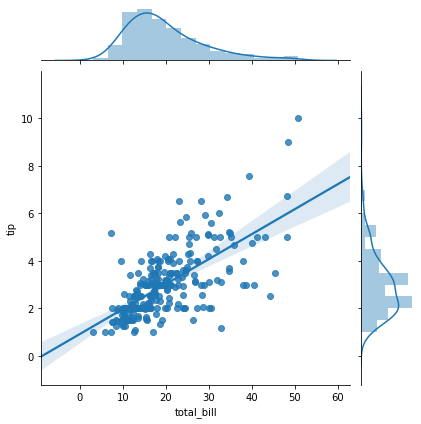

In [10]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='reg')
plt.show()

## Pair-plot

**Pair-plot** will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

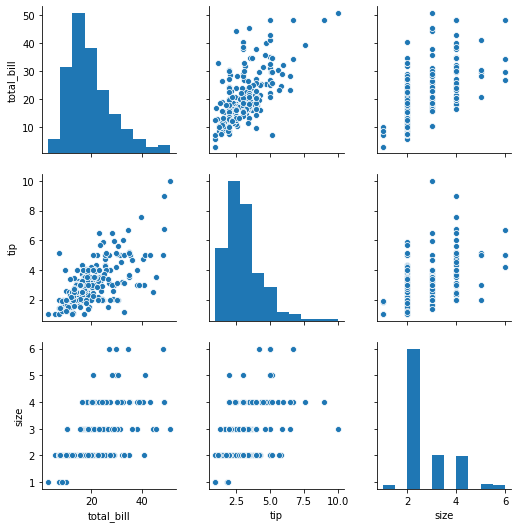

In [11]:
sns.pairplot(df)
plt.show()

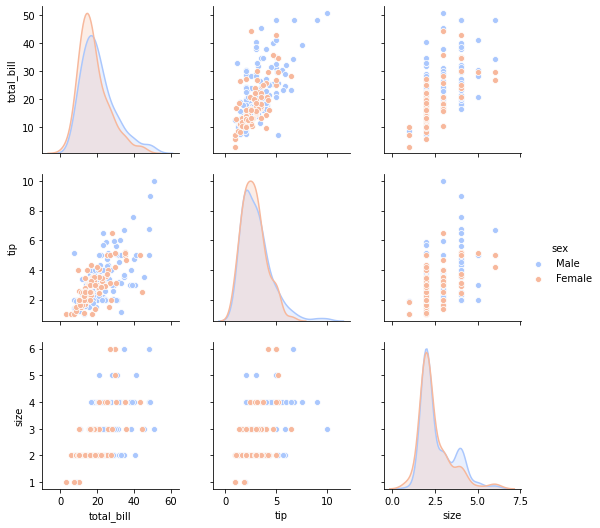

In [12]:
sns.pairplot(df,hue='sex',palette='coolwarm')
plt.show()

## Rug plot

**Rugplots** are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot

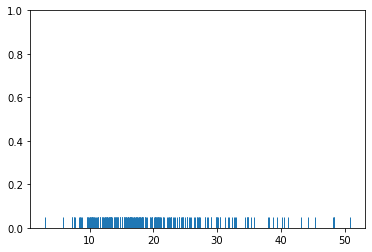

In [13]:
sns.rugplot(df['total_bill'])
plt.show()

## KDE (Kernel Density Estimation ) Plot

**KDE plots** replace every single observation with a Gaussian (Normal) distribution centered around that value.

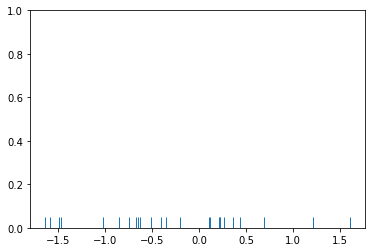

In [14]:
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);
plt.show()

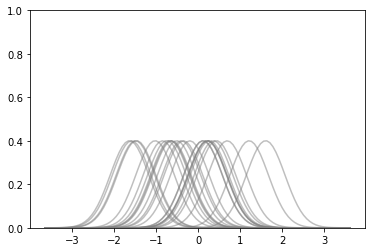

In [15]:
# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)
plt.show()

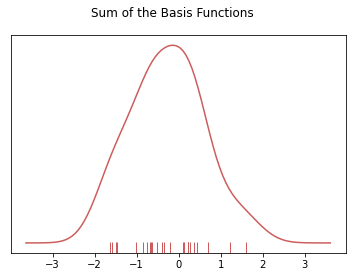

In [16]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")
plt.show()

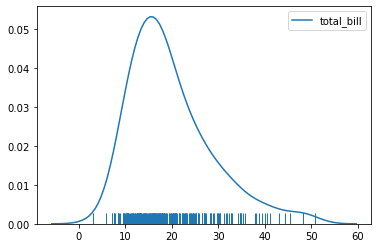

In [17]:
# Same with our dataset
sns.kdeplot(df['total_bill'])
sns.rugplot(df['total_bill'])
plt.show()

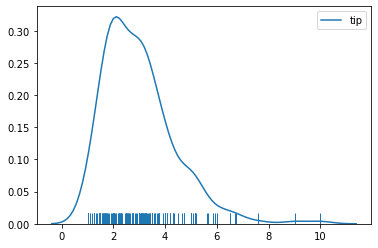

In [18]:
sns.kdeplot(df['tip'])
sns.rugplot(df['tip'])
plt.show()